# Day 9: Text Processing and Data Sample Clustering
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_simple_kmeans.ipynb

## Learning Outcomes
1. Transform text data into numerical vectors
2. Group or cluster the data samples we have

### By the end of class you'll be able to
- Define Bag-of-Words
- Writie K-means to group text data

## Text Vectorization
- The process to transform text data to numerical vectors

### Why do we need text vectorization?
Think back to when we learned about **Label Encoding** and **One-Hot Encoding**: We took categories (text) and transformed them into numerical values.

Text vectorization is similar in that we are taking text and turning it into something a machine can understand and manipulate by translating a word in to a unique vector of numbers. For example, we could associate the unique vector (0, 1, 0, 1) to the word queen.

**Question: What are some other use cases for text vectorization?**

### Use Cases for Text Vectorization
- Count the number of unique words in each sentence (Bag-of-Words, we'll discuss this shortly!)
- Assign weights to each word in the sentence.
- Map each word to a number (dictionary with words as key and numbers as values) and represent each sentences as the sequence of numbers

## Bag-of-Words Matrix
- Bag-of-Words (BoW) is a matrix where its rows are sentences and its columns are unique words seen across all of the sentences

### BoW Example
We have the following 4 sentences:

1. This is the first sentence.
2. This one is the second sentence.
3. And this is the third one.
4. Is this the first sentence?

Question: Given the above sentances, how many unique words are there?

A BoW matrix would look like the following, where 0 means the word does not appear in the sentence, and 1 means the word does appear in the sentence

<img src="../static/screenshots/day9-1.png">

### BoW Worksheet (7 min)
**Complete the following worksheet on your own:**

- Copy [this blank table](https://docs.google.com/presentation/d/1B7v33fPEwblhHYBCSrCvKRBZz776Df4T_t2jcPXt4k8/edit#slide=id.g74c1153bdd_0_15), and create the BoW matrix for the following sentences:
1. Data Science is the best.
2. Data Science has cool topics.
3. Are these the best topics?
4. Is Data Science the best track?

## BoW in Sklearn
We can write a function to return a BoW matrix

Below, we will see how we can build a BoW matrix by calling [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=countvectorizer#sklearn-feature-extraction-text-countvectorizer) in sklearn

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

In [2]:
vectorizer = CountVectorizer()
# create a term-document matrix: assign each word a tuple: 
# first number is the sentence, and the second is the unique number that corresponds to the word
# for example, if the word "one" is assigned the number 3,
# then the word "one" that is used in the third sentence is represented by the tuple (2,3)
X = vectorizer.fit_transform(sentences)

# from the term-document matrix, create the BoW matrix
print(X.toarray())

[[0 1 1 0 0 1 1 0 1]
 [0 0 1 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1]
 [0 1 1 0 0 1 1 0 1]]


## How do we get unique words?

In [3]:
# Get the unique words
print(vectorizer.get_feature_names())

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']


### Activity: Worksheet --> sklearn (7 min)
Use sklearn to take the 4 sentences you used in the worksheet and create the BoW matrix using sklearn

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["Data Science is the best.", "Data Science has cool topics.", 
             "Are these the best topics?", "Is Data Science the best track?"]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
# from the term-document matrix, create the BoW matrix
print(X.toarray())
print(vectorizer.get_feature_names())

[[0 1 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 0 0 1]]
['are', 'best', 'cool', 'data', 'has', 'is', 'science', 'the', 'these', 'topics', 'track']


## Clustering
- Clustering is an unsupervised learning method. A cluster is a **group of data points that are grouped together due to similarities in their features**
- This is very often used because we usually **don’t have labeled data**
- K-Means clustering is a popular clustering algorithms: it **finds a fixed number (k) of clusters in a set of data.**
- The goal of any cluster algorithm is to **find groups (clusters) in the given data**

### Question: What are some use cases of clustering?
Examples of Clustering
- Cluster movie dataset -> We expect the movies which their genres are similar be clustered in the same group
- News Article Clustering -> We want the News related to science be in the same group, News related to sport be in the same group

## Demo of K-means

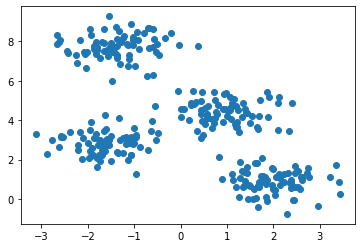

In [8]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# create a sample dataset with 300 data points and 4 cluster centers
X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

# plot the data
plt.scatter(X[:, 0], X[:, 1])

In [13]:
# from figures import plot_kmeans_interactive

# plot_kmeans_interactive()

### Question: How many samples we have at each cluster?

In [12]:
from sklearn.cluster import KMeans

# k-means algorithm where k = 4
km = KMeans(n_clusters=4)
# perform k-means clustering on the previous dataset
km.fit(X)
# print the 4 cluster centers
print(km.cluster_centers_)

[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


### Answer:

In [15]:
import pandas as pd

print(km.predict(X))

#then obtain the histogram of the above list
dict(pd.Series(km.predict(X)).value_counts())

[1 2 0 2 1 1 3 0 2 2 3 2 0 2 1 0 0 1 3 3 1 1 0 3 3 0 1 0 3 0 2 2 0 2 2 2 2
 2 3 1 0 3 0 0 3 3 2 3 2 1 3 1 2 1 1 3 2 3 2 1 2 0 2 3 3 3 2 1 2 3 0 3 2 3
 3 2 3 0 1 2 1 0 1 1 2 0 1 0 2 2 0 1 2 3 3 0 1 1 0 3 2 1 2 1 0 1 1 0 2 0 3
 3 1 2 1 0 2 1 1 0 3 1 3 1 1 1 1 3 1 3 2 3 3 1 2 3 3 2 0 2 2 3 0 3 0 3 2 0
 2 2 2 0 2 0 1 3 2 3 1 0 2 0 0 1 0 3 3 0 1 0 0 2 1 0 3 2 1 1 0 3 1 0 3 3 0
 0 0 0 1 2 0 3 0 0 3 3 3 0 3 2 0 3 1 3 0 2 3 2 0 2 0 3 0 0 2 3 3 1 1 0 2 1
 1 3 1 3 0 2 2 0 0 2 0 1 3 0 1 3 2 3 1 0 1 2 2 2 2 3 3 2 0 3 1 0 3 3 3 1 1
 2 0 0 3 1 2 3 0 2 0 1 1 3 3 0 1 1 1 0 2 2 1 1 0 1 1 1 2 3 2 0 1 1 2 2 2 1
 1 0 2 3]


{3: 75, 2: 75, 1: 75, 0: 75}

## How to choose the optimal number (K) of clusters?
- We could always choose a high number, but we may be wasting a lot of time and resources when a smaller number would give us the same results. How do we know the best K to pick so that we are running k-means as efficiently as possible?

#### Possible (min and max cluster)
- k=1 (one big cluster)-> minimum number of cluster
- k=300 (number of samples) -> the maximum number of cluster


## The Elbow Method
We can find the optimal K by utilizing the **Elbow Method**: a method that **assigns a score to each K**. When we plot these scores, we will get a line that looks like an arm bending at the elbow. The **K value that is closest to the "elbow" point of the graph is our optimal K**

Scores can be calculated two different ways:
1. **Distortion**: the average of the squared distances from each sample to its closest cluster center. Typically, the Euclidean distance metric is used. The lower the distortion, the better the score
    - For numberes 1 to k, compute the following:
        - Euclidean squared distance formula: $\sum_{j=1}^{k} (a_j-b_j)^2$
        - For each sample, find the squared distance between the sample and all k cluster centers, and then pick the closest center (shortest distance)
        - Take the average of the above
2. Inertia: the sum of squared distances of samples to their closest cluster center. The lower the inertia, the better the score
    - We'll use the same Euclidean squared distance formula for here as well.

Either scoring method is valid, and will give you the same optimal K value. Below we will look at how to implement both scoring methods:

## Distortion

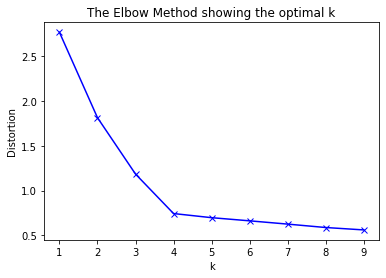

In [17]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    # fit the k-means for a given k to the data (X)
    km = KMeans(n_clusters=k)
    km.fit(X)
    # distance.cdist finds the squared distances
    # axis=1 allows us to keep the min for each sample, not jsut the min across the entire dataset
    # find the closest distance for each sample to a center, and take the average
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow: bx- = use a solid (-) blue (b) line, 
# and mark the x-axis points with an x (x)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Intertia

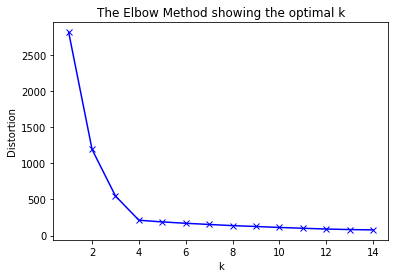

In [18]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    # inertia is an attribute of km!
    # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
    sum_of_squared_distances.append(km.inertia_)
    

    # Plot the elbow
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Activity - Elbow Method (7 min)¶
Using the starter code below, prove that 6 is the optimal K for clustering the data using k-means using the elbow method. You can use either Distortion or Inertia.

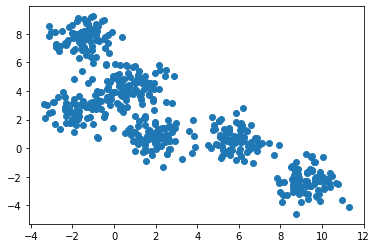

In [19]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

Data, blob_y = make_blobs(n_samples=500, centers=6,
                          random_state=0, cluster_std=0.80)

# plot the data
plt.scatter(Data[:, 0], Data[:, 1])

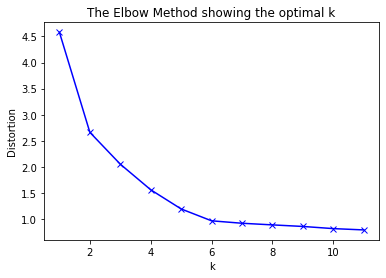

In [25]:
import numpy as np
from scipy.spatial import distance

def get_k_distortion(data, max_range):
    distortions = []
    K = range(1, max_range)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(data)
        distortions.append(sum(np.min(distance.cdist(data, km.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
    
get_k_distortion(Data, 12)

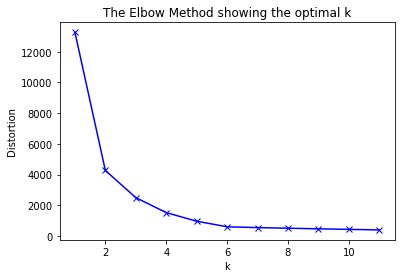

In [28]:
import numpy as np
from scipy.spatial import distance

def get_k_intertia(data, max_range):
    sum_of_squared_distances = []
    K = range(1,max_range)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(data)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

get_k_intertia(Data, 12)

## Activity: Combine Text Vectorization and Clustering the Texts (30 min)
**Complete the activity below in groups of 3**

- We want to cluster the given sentences
- To do this: We want to use both concepts we learned today:
    - Vectorize the sentences (text-vectorization)
    - Apply Kmeans to cluster our vectorized sentences
- **Note**: We want to remove stop words from our sentences (and, or, is, etc.). To do this, we add stop_words='english' to our call to CountVectorize
- **Hint**: Look at the sentences in the starter code. How would you cluster the data if you were doing the clustering? Use that number as your K to start with.

#### My Solution - Do not use LOL

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

def vectorize_sentences(sentences, clusters):
    # 1. Vectorize the sentences by BOW
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    
    # 2. Cluster 2- Cluster the vectorized sentences in 2 groups by K-Means
    km = KMeans(n_clusters = clusters)
    km.fit(X)
#     print(km.cluster_centers_)
#     print(km.predict(X))

    # 3. Obtain which group the S1 will be mapped
    # print(dict(pd.Series(km.predict(X)).value_counts())) #then obtain the histogram of the above list    
    
    # 4. Do step 3 for all S1 … S8
    for sentence in sentences:
        y= vectorizer.transform([sentence])
        prediction = km.predict(y)
        print(prediction)    
    
    
vectorize_sentences(sentences, 2)

[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]


### Milad's Solution

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

def vectorize_sentences_solution(sentences):
    # remove stop words from sentences (and, or, is, ...) and instantiate the Bag-of-Word 
    vectorizer = CountVectorizer(stop_words='english') # Highly recommend to always do this stop_words='english' = remove stop words in English
    # transform sentences into numerical arrays 
    X = vectorizer.fit_transform(sentences) # transform to BOW matrix
    # print unique words (vocabulary)
    print(vectorizer.get_feature_names())
    print(X.shape)
    
    # We know there are two group of sentences -> Group 1: cats | Group 2: Google
    true_k = 2
    model = KMeans(n_clusters=true_k, init='k-means++') # init='k-means++' not an important parameter
    model.fit(X)

    # Testing our model: For a new sentence, let's see how the model will cluster it. 

    # first we should convert the sentence to a numerical array
    Y = vectorizer.transform(["chrome browser to open."]) # vector the represent these sentences
    print('Y:')
    print(Y.toarray()) # all words will be 0, but Cat and Google will be 1
    prediction = model.predict(Y)
    print("Y Sentences Prediction", prediction)
    # Let's do the same for another sentence
    Y = vectorizer.transform(["My cat is hungry."])
    prediction = model.predict(Y)
    print(prediction)
    # Lets see the model prediction for training docs
    print("Sentences Prediction", model.predict(X))
    
vectorize_sentences_solution(sentences)

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
Y Sentences Prediction [0]
[1]
Sentences Prediction [1 1 0 0 1 1 0 0]


## Other clustering methods and comparison:
http://scikit-learn.org/stable/modules/clustering.html

## Resources:
- https://www.youtube.com/watch?v=FrmrHyOSyhE
- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Summary
- In order to work with text, we should transform sentences into vectors of numbers
- We learned a method for text vectorization -> Bag-of-Words (CountVectorizer)
    - We will learn TFIDF Vectorizer next session
- Clustering is an unsupervised learning algorithm that obtains groups based on the geometric positions of features
- K-means is one clustering method that separates the data into K number of clusters. The Elbow method can be used to find the optimal K

## Optional: Obtain the centers (centriods) of two cluster: which words would be close to the centriods

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sentences = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

# vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names())
print(X.shape)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)
# print('M:')
# print(model.cluster_centers_.argsort())
# print(model.cluster_centers_.argsort()[:, ::-1])
# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),


# print("\n")
# print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
print('Y:')
print(Y.toarray())
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
# Lets see the model prediction for training docs
print(model.predict(X))

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)
Y:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]]
[1]
[0]
[0 0 1 1 0 0 1 1]


# Day 10: Naive Bayes
https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Notebooks/remote_simple_naive_Bayes.ipynb

**During extended Day 9**

## Learning Objectives
By the end of today's class, you should be able to...
- Review Bayes'formula for conditional probability
- Apply Bayes' rule for text classification
- Write a Python function for text classification with Naive Bayes

## Text Classification
Text classification is the **process of attaching labels to bodies of text**, e.g., tax document, medical form, etc. based on the content of the text itself.

Think of your spam folder in your email. How does your email provider know that a particular message is spam or “ham” (not spam)?

#### Question: How do you tell if an email is spam or ham? What are the signs?
##### Followup: How does your process differ from a text classifier's?

## Review of conditional probability and its application on Text
- Assume this small dataset is given:

<img src="../static/screenshots/day10-1.png">

## Question: What is the probability that an email is spam? What is the probability that an email is ham?
$P(spam) = ?$

$P(ham) = ?$

## Activity: Create spam and ham dictionary
- Create two dictionaries for spam and ham where keys are unique words and values are the frequency of each word
    - Example: if the word "password" shows up 4 times in the text, then in the dictionary, the key would be "password" and the value would be 4
- Create the dictionaries programatically using for loops
- Use the below text to create your dictionaries:
    - spam_text= ['Send us your password', 'review us', 'Send your password', 'Send us your account']
    - ham_text= ['Send us your review', 'review your password']

In [65]:
spam_text= ['Send us your password', 'review us', 'Send your password', 'Send us your account']
ham_text= ['Send us your review', 'review your password']

spam = {}
for i in spam_text:
    for j in i.lower().split(' '):
        if j not in spam:
            spam[j] = 1
        else:
            spam[j] += 1

print("Spam Dictionary:")            
print(spam)
print("\n")

ham = {}
for i in ham_text:
    for j in i.lower().split(' '):
        if j not in ham:
            ham[j] = 1
        else:
            ham[j] += 1

print("Ham Dictionary:")
print(ham)

Spam Dictionary:
{'send': 3, 'us': 3, 'your': 3, 'password': 2, 'review': 1, 'account': 1}


Ham Dictionary:
{'send': 1, 'us': 1, 'your': 2, 'review': 2, 'password': 1}


## Question: We know an email is spam, what is the probability that password be a word in it?
What is the frequency of "password" in a spam email?

Answer:

$P(password \mid spam) = 2/(3+3+3+2+1+1) = 2/13 \approx 15.38\%$

In [67]:
# or 
p_password_given_spam = spam['password'] / sum(spam.values())
print(p_password_given_spam)

0.15384615384615385


## Question: We know an email is spam, what is the probability that password be a word in it?
What is the frequency of "password" in a ham email?

Answer:
$P(password \mid ham) = 1/(1+2+1+1+2+0) = 1/7 \approx 14.29\%$

In [68]:
# or 
p_password_given_ham = ham['password'] / sum(ham.values())
print(p_password_given_ham)

0.14285714285714285


## Question: Assume we have seen the word "password" in an email, what is the probability that the email is spam?
- $P(spam \mid password) = ?$
- Hint: Use Bayes' rule and Law of Total Probability (LOTP):
    - Bayes' Rule: $P(spam \mid password) = (P(password \mid spam) P(spam))/ P(password)$
    - LOTP: $P(password) = P(password \mid spam) P(spam) + P(password \mid ham) P(ham)$

In [76]:
# Calculated by viewing our dataset
p_spam = spam['password'] / (spam['password'] + ham['password'])
p_ham = ham['password'] / (spam['password'] + ham['password'])

# LOTP
p_password = p_password_given_spam * p_spam + p_password_given_ham * p_ham 
print("Probability of Password:", p_password)

# Bayes Rule
p_spam_given_password = p_password_given_spam * p_spam / p_password
print("Probability of spam given password:", p_spam_given_password)

Probability of Password: 0.15018315018315018
Probability of spam given password: 0.6829268292682927
